
## PREDICTION OF AUTO-INSURANCE CLAIMS BY DRIVERS

Porto Seguro, a large Brazilian insurance company, provides auto insurance policies for their customers. Accurately determining if a customer will file a claim will result in lower prices for better drivers and savings for the company. As part of a Kaggle competition, Porto Seguro has asked if data science and machine learning methods can provide better predictions for their customers using collected data. Using the methods covered in our data science class we will assemble a method for cleaning and processing the Porto Seguro driver dataset. The resulting predictions will be compared against others in the competition as a way to compare performance.

PROGRESS:

In [33]:
#includes
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, StandardScaler, LabelBinarizer, MultiLabelBinarizer
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso, LassoCV
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier



In [35]:
#load and print data
df = pd.read_csv("./train.csv")
df

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1,4,0,0,0,0,0,...,4,2,0,9,0,1,0,1,1,1
6,20,0,2,1,3,1,0,0,1,0,...,3,0,0,10,0,1,0,0,1,0
7,22,0,5,1,4,0,0,1,0,0,...,7,1,3,6,1,0,1,0,1,0
8,26,0,5,1,3,1,0,0,0,1,...,4,2,1,5,0,1,0,0,0,1
9,28,1,1,1,2,0,0,0,1,0,...,3,5,0,6,0,1,0,0,1,0


We see that we have 595212 instances and 59 features. None of the features besides the ID seem to have large numbers in them, with most features having an average smaller than 1.

In [36]:
#statistics of the different features
df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We will now display information about the 59 features. We notice that all of them are stored as integers or floats. However, some of them are binary or categorical so we will convert them to one hot vectors later.


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

We also notice that there is an id feature which is completely useless since it is unique for its instance. We remove that and we also remove the target, which is what we are predicting. We also turn the target into a numpy array, to prepare it for machine learning.

In [38]:
y = df['target']
#turn y into numpy array
y = np.array(y)
X_raw = df.drop(['target','id'], axis = 1)

In [39]:
X_raw['ps_reg_03'][0:100]

0     0.718070
1     0.766078
2    -1.000000
3     0.580948
4     0.840759
5     2.332649
6     0.617454
7     0.607248
8     0.901388
9     2.316652
10    0.795692
11    0.378319
12    0.548293
13    0.684197
14    1.052972
15   -1.000000
16    0.699553
17    0.810864
18   -1.000000
19    0.402337
20    1.372725
21    0.955903
22    0.742041
23   -1.000000
24    0.587367
25   -1.000000
26    0.666146
27    1.034408
28   -1.000000
29    1.155692
        ...   
70   -1.000000
71    0.604669
72    0.446514
73   -1.000000
74    1.135782
75    0.835165
76    0.843727
77    1.074418
78    0.968569
79    0.662382
80   -1.000000
81    0.918559
82   -1.000000
83    0.497494
84    0.830662
85    0.935414
86    0.840387
87    0.751665
88    1.316007
89   -1.000000
90    1.156774
91    0.505594
92   -1.000000
93    1.675560
94    0.666146
95    0.918218
96    0.733570
97    0.713705
98    1.198697
99    0.640312
Name: ps_reg_03, Length: 100, dtype: float64

We know that -1 is a NaN value for this dataset. Taking a look at which features have a -1 value we see that 
3 or 4 features seem to have about 10-20% as NaNs. We could remove these features but we chose to convert them to NaN values, since they might still be useful.

In [40]:
np.sum(df.isin([-1]))

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


In the graph below we observe feature's 'ps_reg_03' large percentage of '-1' values.

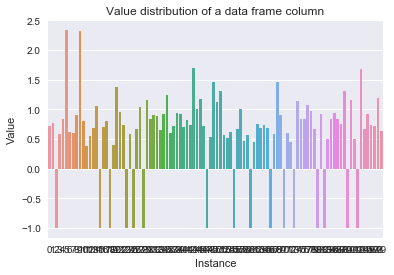

In [41]:

X_raw['ps_reg_03'][0:5]
instances = list(range(0,100))
sns.barplot(instances, X_raw['ps_reg_03'][0:100])
plt.title("Value distribution of a data frame column")
plt.ylabel("Value")
plt.xlabel("Instance")

In [42]:
#Replace -1 with Nan:
df = df.replace(-1, np.NaN)
np.sum(df.isin([-1]))

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


We now briefly examine the ratio of the values for the target variable, and observe that only an extremely small group of people actually file an auto-insurance claim.

In [43]:
print("Percentage of people that file an auto-insurance claim: ", np.sum(y==1)/y.shape[0])

Percentage of people that file an auto-insurance claim:  0.0364475178592


In [44]:
#grab all binary and categorical features so that we can convert them to one hot vectors
cat_attributes = [s for s in df.columns if 'cat' in s]
bin_attributes = [s for s in df.columns if 'bin' in s]

We will now select binary and categorical features in order to transform them to one hot vectors. We will separate numerical features for scaling.

In [45]:
cat_bin_attributes = [s for s in df.columns if 'cat' in s or 'bin' in s]
num_attributes = X_raw.drop(cat_bin_attributes, axis = 1)
num_attributes = num_attributes.columns

We now create a pipeline that will one hot encode the categorical variables but will also scale the numerical ones and impute the missing NaN values, by turning them into the median of the rest of the values in that feature.

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin
class LabelBinarizer_new(TransformerMixin, BaseEstimator):
    def fit(self, X, y = 0):
        return self
    def transform(self, X, y = 0):
        encoder = LabelBinarizer();
        result = encoder.fit_transform(X)
        return result; 
    
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    

def cat_pipeline(attributes):
    p = []
    for i, x in enumerate(attributes):
        p.append(("cat_pipeline_{}".format(i),
                  Pipeline([
                     ('selector', DataFrameSelector(x)),
                     ('label_binarizer', LabelBinarizer_new()),
                  ])
        ))
    return FeatureUnion(transformer_list=p)

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attributes)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = FeatureUnion(transformer_list=[
        ("cat_pipeline", cat_pipeline(cat_bin_attributes)),
        ("num_pipeline", num_pipeline),

    ])

In [47]:
X = full_pipeline.fit_transform(X_raw)
X.shape


(595212, 226)

We now have 226 features.

In [48]:
print("New number of features: ", X[1,:].shape[0])

New number of features:  226


## TESTING WITH ALL THE INPUT DATA

We first split our processed data into training and testing, and furthermore, the training set into training and validation.

In [49]:
#split the data into training and testing
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.35, random_state=23)

#split the training data into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.35, random_state=23)


Since the accuracy rating is not that helpful, given the abundance of the 0's for target values, we will used the normalized gini function to predict how well our models do.

In [33]:
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
 
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

We will first try some basic machine learning classifiers, such as Logistic Regression and Naive Bayes.

In [34]:
#The first model that I am trying is a simple Logistic Regression model.
clf = LogisticRegression()
clf2 = GaussianNB()
clf3 = RandomForestClassifier()
clf.fit(X_train,y_train)

#Accuracy of logistic regression.
#It scores great on the validation set.
clf.score(X_val,y_val)
log_predicts = clf.predict_proba(X_train)
print("Logistic Regression")
print("Train Data:",gini_normalized(y_train, log_predicts[:,1]))
log_predicts = clf.predict_proba(X_val)
print("Test Data:",gini_normalized(y_val, log_predicts[:,1]))

Logistic Regression
Train Data: 0.280326345038
Test Data: 0.256930562179


In [35]:
print("Naive Bayes")
clf2 = GaussianNB()
clf2.fit(X_train,y_train)
nb_predicts = clf2.predict_proba(X_train)[:,1]
print("Train Data:",gini_normalized(y_train,nb_predicts))
nb_predicts = clf2.predict_proba(X_val)[:,1]
print("Test Data:",gini_normalized(y_val,nb_predicts))

Naive Bayes
Train Data: 0.202383048832
Test Data: 0.172993019125


The difference between the performance on the training data versus the test data shows a high level of variance. This
implies that using models that handle high variance will lead to better results.

By using Logistic regression using an L1 regularization parameter we can achieve a more generalized model that will perform better 

In [36]:
print("Logistic Regression with l1 and a C value of .1")
log = LogisticRegression(C=.1, penalty='l1', solver='liblinear')
log.fit(X_train,y_train)
predicts = log.predict_proba(X_train)[:,1]
print("Train Data:",gini_normalized(y_train,predicts))
predicts = log.predict_proba(X_val)[:,1]
print("Test Data:",gini_normalized(y_val,predicts))

Logistic Regression with l1 and a C value of .1
Train Data: 0.272643660048
Test Data: 0.259356049818


Taking this idea further we can use a Lasso regression model between the two categories. LassoCV performs cross validation
within the fitted training set to find the ideal hyperparameter alpha.

In [37]:
print("Lasso with Cross Validation")
lasso = LassoCV() 
lasso.fit(X_train,y_train)
predicts = lasso.predict(X_train)
print("Train Data:",gini_normalized(y_train,predicts))
predicts = lasso.predict(X_val)
print("Test Data:",gini_normalized(y_val,predicts))

Lasso with Cross Validation
Train Data: 0.273389215109
Test Data: 0.260776718398


## PREDICTIONS AFTER MAKING DIFFERENT DATASET SELECTIONS

To attain better results we  We will now only use only a small amount of the samples with 0 as a target instead of the whole set, in order to balance out the data. We first perform a search to see how many of the 0 target cases we should keep. This is tested by running logistic regression which is a good predictor on the data.

In [38]:
popnum = []
for i in [25000,50000,75000,90000,100000,110000,125000,150000]:
    sample = np.random.choice(np.where(y==0)[0],i)
    sample = np.concatenate([sample,np.where(y==1)[0]])
    X_bal = X[sample]
    y_bal = y[sample]
    X_tr, X_test, y_tr, y_test = train_test_split(X_bal, y_bal, test_size=0.35, random_state=23)
    X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.35, random_state=23)
    
    clf.fit(X_train,y_train)
    log_predicts = clf.predict_proba(X_val)
    score = gini_normalized(y_val, log_predicts[:,1])
    print("Number of 0's: ", i, "Prediction Score: ", score)
    popnum.append(score)

Number of 0's:  25000 Prediction Score:  0.242100430041
Number of 0's:  50000 Prediction Score:  0.259932548219
Number of 0's:  75000 Prediction Score:  0.245458037457
Number of 0's:  90000 Prediction Score:  0.24844178481
Number of 0's:  100000 Prediction Score:  0.254788519681
Number of 0's:  110000 Prediction Score:  0.253375531519
Number of 0's:  125000 Prediction Score:  0.258836980715
Number of 0's:  150000 Prediction Score:  0.249804660807


In [39]:
clf3 = RandomForestClassifier(n_jobs=-1, max_features='sqrt', oob_score = True) 
 
# Use a gridsearch for parameter finding
param_grid = { 
           "n_estimators" : [100,200],
           "max_depth" : [20, 50,100],
           "min_samples_leaf" : [10,30]}
 
CV_rfc = GridSearchCV(estimator=clf3, param_grid=param_grid, cv= 10)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'max_depth': 20, 'min_samples_leaf': 10, 'n_estimators': 100}


We can see that 100000 instances with target value of 0 is best for making predictions. This is more visible in the following graph.

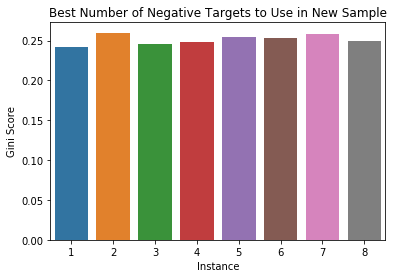

In [40]:
instances = list(range(1,9))
sns.barplot(instances,popnum)
plt.title("Best Number of Negative Targets to Use in New Sample")
plt.ylabel("Gini Score")
plt.xlabel("Instance")

Therefore, we now prepare new datasets by using only 100000 of the 0 target cases and all the 1 target cases. The relationship between 1s and 0s is now about 1:5.

In [41]:
sample = np.random.choice(np.where(y==0)[0],100000)
sample = np.concatenate([sample,np.where(y==1)[0]])

X_bal = X[sample]
y_bal = y[sample]
X_tr, X_test, y_tr, y_test = train_test_split(X_bal, y_bal, test_size=0.35, random_state=23)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.35, random_state=23)

clf.fit(X_train,y_train)
log_predicts = clf.predict_proba(X_val)
score = gini_normalized(y_val, log_predicts[:,1])
print("Prediction Score: ", score)

Prediction Score:  0.255385216688


To maximize our scores we can attempt to use ensemble methods. First we are going to use a Random Forest and optimize it and eventually we can use voting classifiers or a booster.

## Support Vector Classifier

Due to the time requirements of running SVC with an rbf kernel, we will reduce the number of features to the 10 most
important. To do this we will use a lasso regression and the SelectFromModel sklearn function. We will steadily increase
the threshold for features until no more than 10 are left. These columns will make up our new training set.

In [43]:
clf = LassoCV() 
clf.fit(X_train,y_train)
predicts = clf.predict(X_train)
print("Train Data:",gini_normalized(y_train,predicts))
predicts = clf.predict(X_test)
print("Test Data:",gini_normalized(y_test,predicts))

sfm = SelectFromModel(clf, threshold=0.0001)
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]
while n_features > 10:
    sfm.threshold += 0.0005
    X_transform = sfm.transform(X)
    n_features = X_transform.shape[1]
    
print("Remaining Features:",sfm.transform(X).shape[1])
X_lasso = sfm.transform(X)

X_reduced_tr, X_reduced_test, y_reduced_tr, y_reduced_test = train_test_split(X_lasso, y, test_size=0.35, random_state=23)


Train Data: 0.276907362482
Test Data: 0.247953415803
Remaining Features: 10


Now we will run an SVC.

In [44]:
svm_clf = SVC(C=10)
svm_clf.fit(X_reduced_tr,y_reduced_tr)
predicts = svm_clf.predict(X_reduced_tr)
print("Train Data:",gini_normalized(y_reduced_tr,predicts))
predicts = svm_clf.predict(X_reduced_test)
print("Test Data:",gini_normalized(y_reduced_test,predicts))


Train Data: 0.00542409333446
Test Data: 0.00336334966684


Despite the long runtime, there isn't much accuracy in the testing set.

## ENSEMBLE

The first ensemble method that we use is a random forest, which we attempt to optimize through a grid search.

In [42]:
optimized_rf = RandomForestClassifier(n_jobs=-1, max_features='sqrt', oob_score = True, max_depth=50, min_samples_leaf=10, n_estimators=100)
optimized_rf.fit(X_train,y_train)
rf_predicts = optimized_rf.predict_proba(X_val)
gini_normalized(y_val, rf_predicts[:,1])

0.27614146175046045

## Adaboost

Using our most successful model, Random Forest classification we will attempt to improve performance.

In [47]:
print("Adaboost Random Forest")
abr = AdaBoostClassifier(optimized_rf, n_estimators=10)
abr.fit(X_train,y_train)
predicts = abr.predict_proba(X_train)[:,1]
print("Train Data:",gini_normalized(y_train,predicts))
predicts = abr.predict_proba(X_test)[:,1]
print("Test Data:",gini_normalized(y_test,predicts))

Adaboost Random Forest
Train Data: 1.0
Test Data: 0.274439863961


With this modeling technique we can see further improvement using a high estimator count at the expense of 
longer runtimes.

In [49]:
optimized_rf = RandomForestClassifier(n_jobs=-1, max_features='sqrt', oob_score = True, max_depth=50, min_samples_leaf=10, n_estimators=500)
abr = AdaBoostClassifier(optimized_rf, n_estimators=20)
abr.fit(X_train,y_train)
predicts = abr.predict_proba(X_train)[:,1]
print("Train Data:",gini_normalized(y_train,predicts))
predicts = abr.predict_proba(X_test)[:,1]
print("Test Data:",gini_normalized(y_test,predicts))

Train Data: 0.99873465257
Test Data: 0.28075625781


## Gradient Boosting

A final Boosting method wil use Gradient Boosting

In [ ]:
print("Gradient Boosting Regressor")
gbrt = GradientBoostingClassifier(learning_rate=0.01, max_depth=20)
gbrt.fit(X_train,y_train)
predicts = gbrt.predict_proba(X_train)
print("Train Data:",gini_normalized(y_train,predicts))
predicts = gbrt.predict_proba(X_test)
print("Test Data:",gini_normalized(y_test,predicts))

Gradient Boosting Regressor


## Conclusion

After processing and analyzing the data, it became much easier to utilize different machine learning algorithms in order to better predict if individuals would file an auto-insurance claim within the next year. Even though the dataset had some issues, as aforementioned, that made it more difficult to estimate its accuracy, it was tackled by changing the input data. After using the data with a more balanced target feature and using a variety of methods we observed that a Random Forest Classifier or a Gradient Booster would be some of the best methods to use, given the Gini evaluation function. Both of these methods would give Gini scores above 0.27 and sometimes reaching close to 0.28. Some of the least successful models used were Naive Bayes and, surprisingly, Support Vector Machines, who were both extremely time consuming and unable to make good predictions on the data. Ultimately, models that work well against a high variance tended to work the best